#### Image Classification using ML Binary

Import the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset

In [4]:
df = pd.read_csv("banknotes.csv")

In [5]:
df.shape

(1372, 5)

In [6]:
df.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [7]:
df.isnull().sum()

Variance    0
Skewness    0
Curtosis    0
Entropy     0
Class       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   Skewness  1372 non-null   float64
 2   Curtosis  1372 non-null   float64
 3   Entropy   1372 non-null   float64
 4   Class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Variance,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
Skewness,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
Curtosis,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
Entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
Class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


<Axes: >

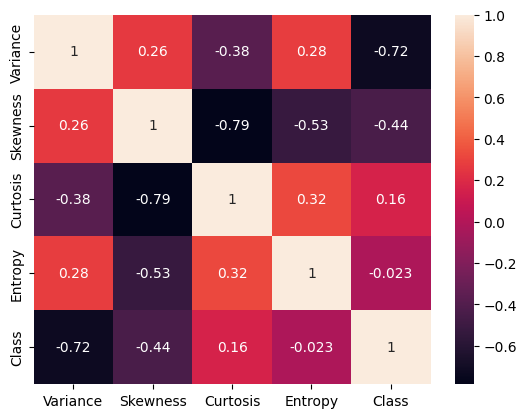

In [13]:
sns.heatmap(df.corr(), annot = True)

In [14]:
df.dtypes

Variance    float64
Skewness    float64
Curtosis    float64
Entropy     float64
Class         int64
dtype: object

Separate the input and output variables

In [15]:
#Input data
x = df.drop('Class', axis=1)

#Output data
y = df['Class']

Explore the data

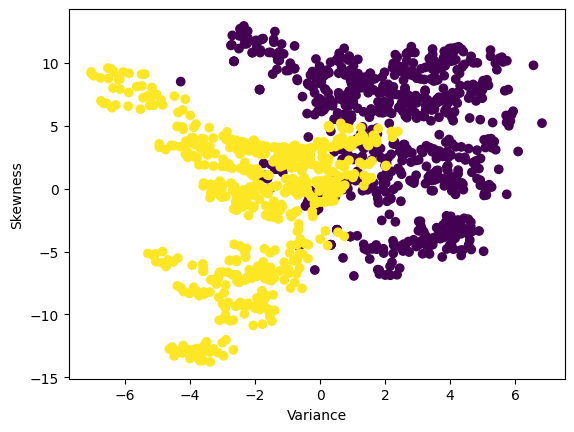

In [21]:
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.scatter(df['Variance'], df['Skewness'], c=y);

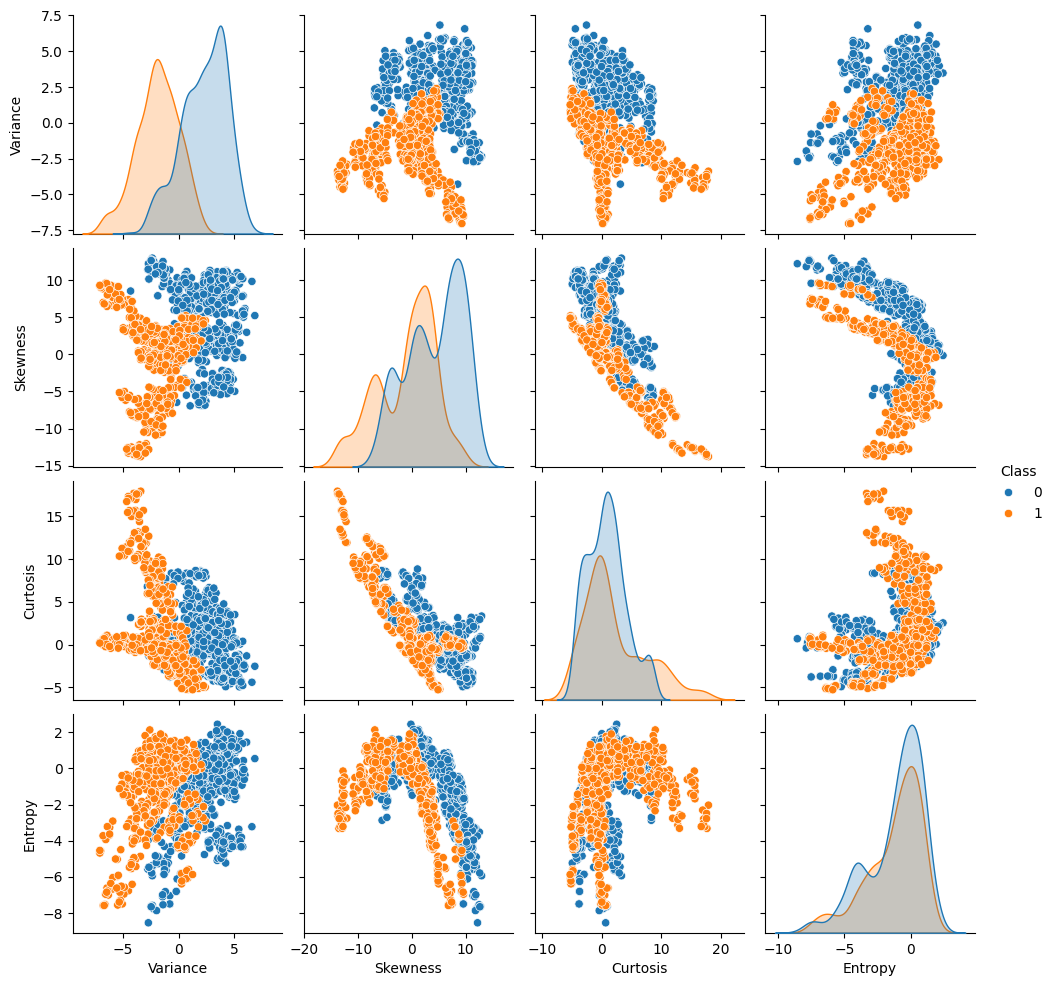

In [22]:
sns.pairplot(df, hue='Class')

In [23]:
y.value_counts()

Class
0    762
1    610
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7e4365837760>,
 [Text(-0.19046171571266454, 1.0833855891822581, '0'),
  Text(0.19046171571266443, -1.0833855891822581, '1')],
 [Text(-0.10388820857054429, 0.5909375940994134, '55.5%'),
  Text(0.10388820857054422, -0.5909375940994134, '44.5%')])

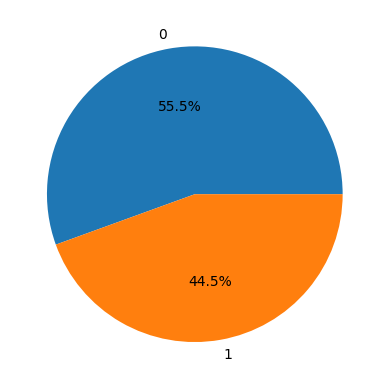

In [38]:
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct="%1.1f%%")

#### Reasons for Scaling or Not Scaling:

- Decision Tree doesn't require because it takes one feature at a time.
- Scaling is used for faster execution
- Scaling is needed when multiple features taken together and one may dominate other
- scaling is important if classification algorithm uses distance between the data points.

### Cross-Validation

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [27]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1029, 4), (343, 4), (1029,), (343,))

#### Build The Model

- Decision Tree is a special algorthm because it itself throws away non-important features
- Naive Bayes not

In [28]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0)

In [29]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

#### Performance Evaluation

In [4]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
y_pred = dtc.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       195
           1       0.97      0.98      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



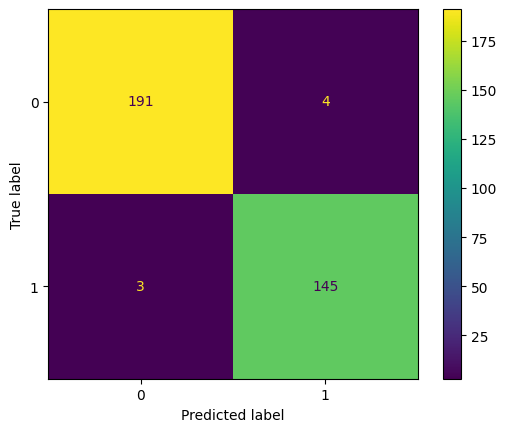

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

Decision Tree makes use of Feature Importance to decide which feature to be used

Techniques - 1. Gini Index and 2. Entropy

## Feature Importances

<BarContainer object of 4 artists>

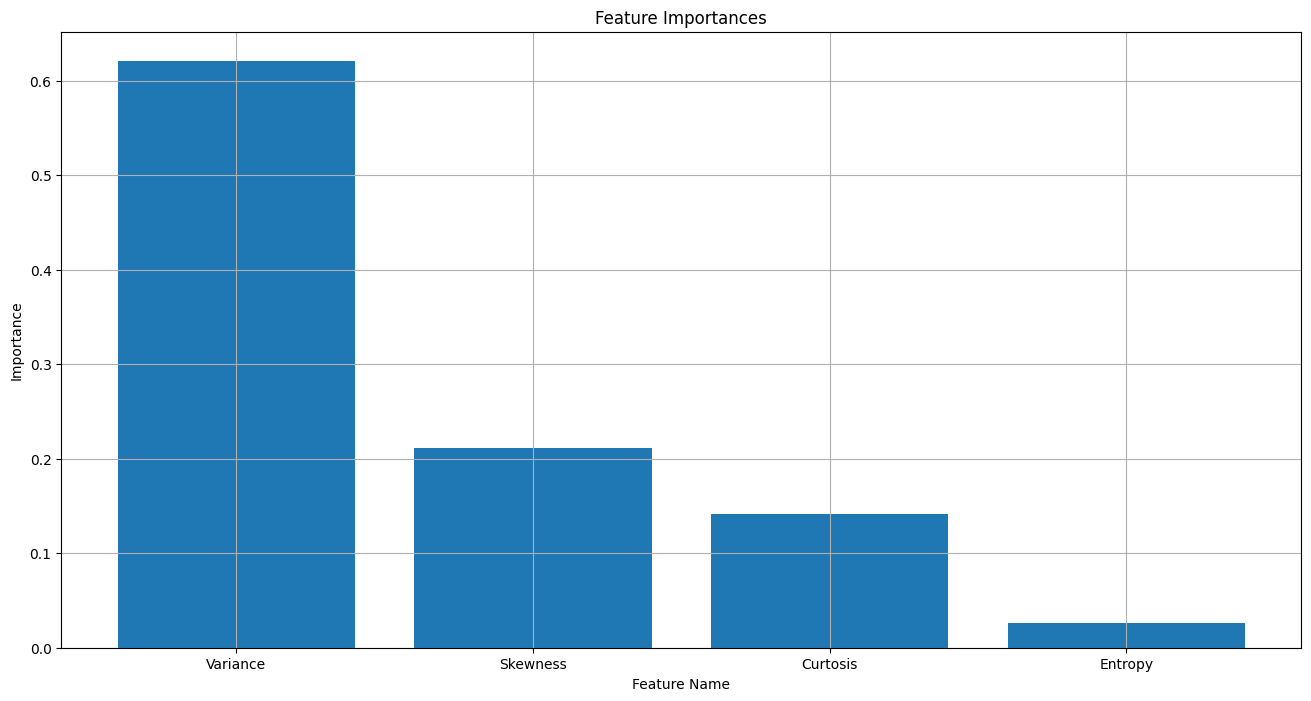

In [41]:
plt.figure(figsize=(16,8))
plt.title('Feature Importances')
plt.xlabel('Feature Name')
plt.ylabel('Importance')
plt.grid()
plt.bar(x.columns, dtc.feature_importances_)


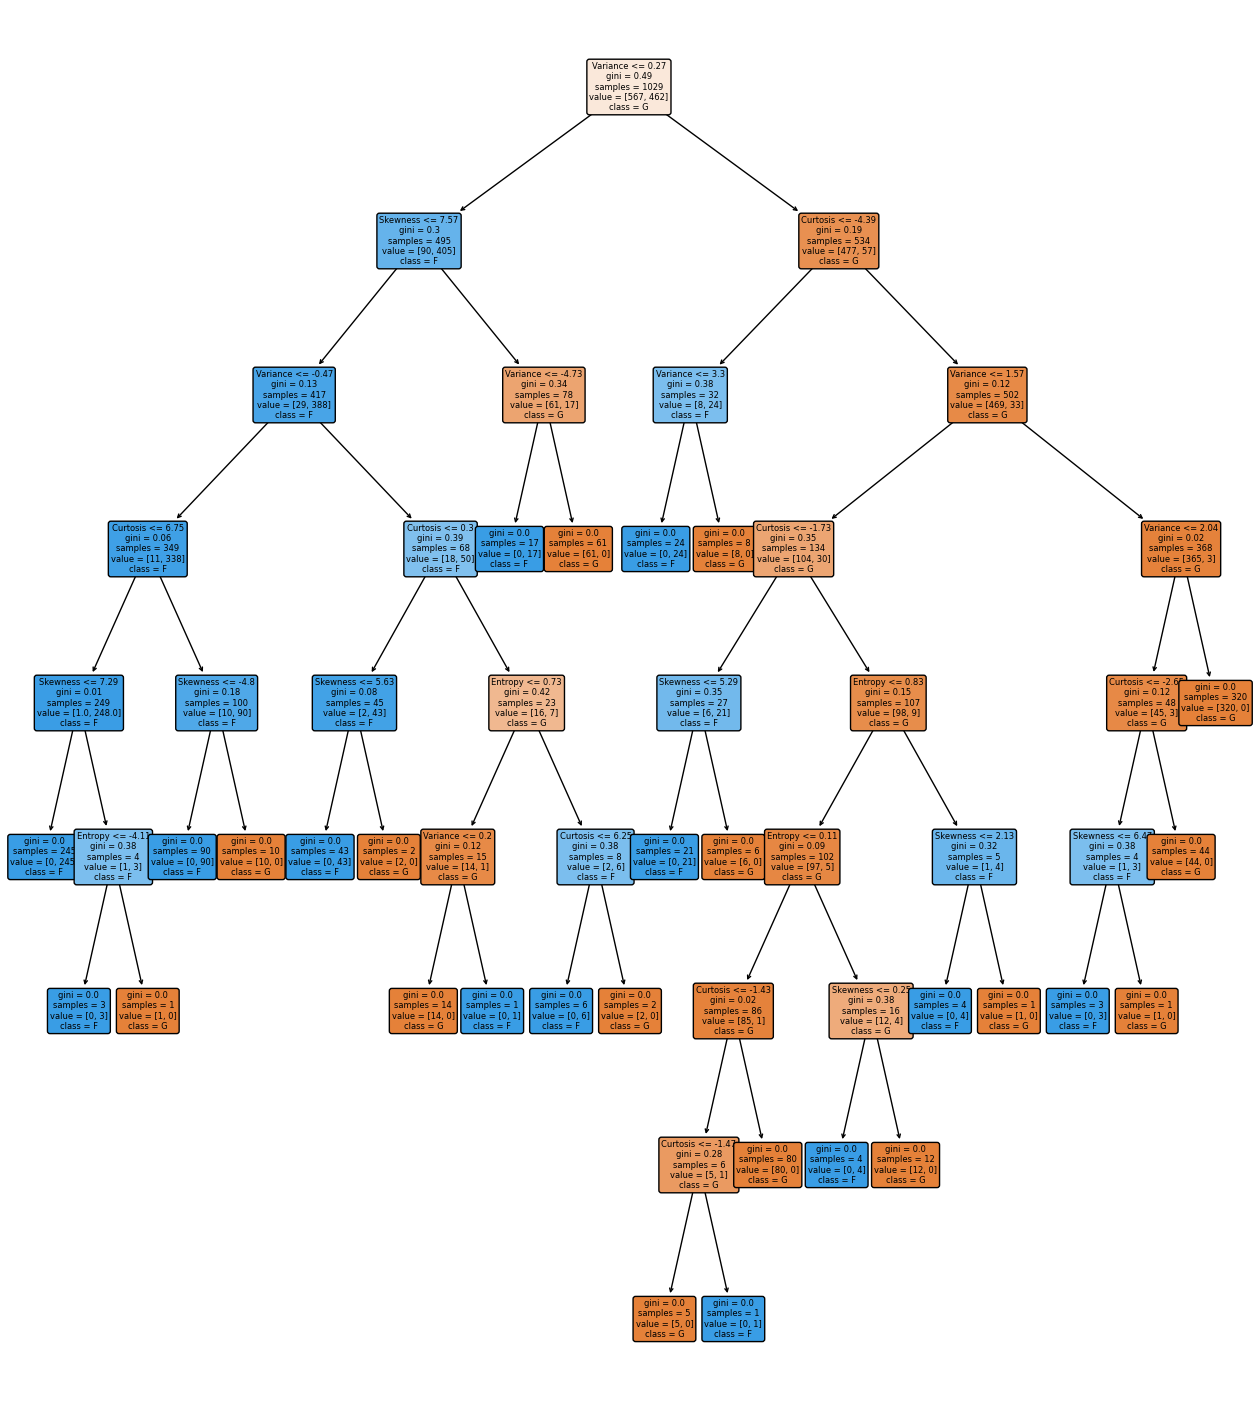

In [43]:
# Plot a Tree of Feature Importances

from sklearn.tree import plot_tree

plt.figure(figsize=(16,18))
plot_tree(dtc, fontsize=6, feature_names=x.columns, class_names=['G','F'],
          filled=True, rounded=True, precision=2);

In [44]:
new = pd.DataFrame([[0.40614, 1.34920, -1.4501, -0.55949],
                    [3.45660, 9.52280, -4.0112, -3.59440],
                    [4.54590, 8.16740, -2.4586, -1.46210]], columns=x.columns)

In [45]:
new

,Variance,Skewness,Curtosis,Entropy
0,0.40614,1.3492,-1.4501,-0.55949
1,3.45660,9.5228,-4.0112,-3.59440
2,4.54590,8.1674,-2.4586,-1.46210


In [46]:
# First is Fake and Others are OG

dtc.predict(new)

array([1, 0, 0])

### Random Forest Classification
#### Apply Random forest of 10 trees and check Accuracy

In [59]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10,random_state=0)

In [60]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [61]:
y_pred = rfc.predict(X_test)
accuracy_score(y_pred, y_test)

0.9941690962099126

In [62]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       193
           1       1.00      0.99      0.99       150

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



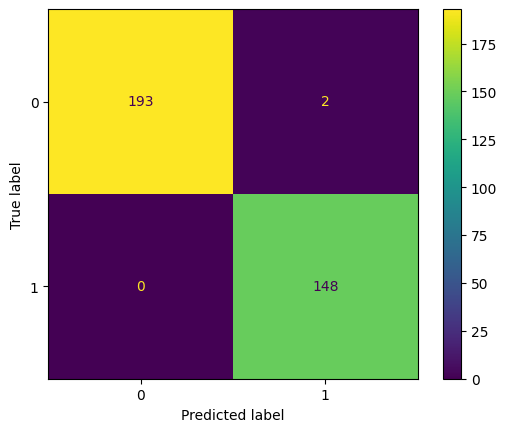

In [63]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)